# Kelvin wake simulation model

A component of the MSc project:

"Analysis of Thames Wave Data and Investigation of Energy Potential."

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy import signal

Set velocity and observation distance.

In [38]:
u = 5
z = 10
g = 9.81

Identify contributing points of stationary phase, $\theta_1$ - transverse, $\theta_2$ - divergent.

*Derived from analysis in MIT 1.138J Wave Propagation - Chapter 4. Gravity Waves In Water.*

$\left\{\begin{array}{c}\tan\theta_1\\\tan\theta_2\end{array}
\right\}=\frac{1\pm\sqrt{1-8\tan^2\beta}}{4\tan\beta}$

Parameterising for the spatial co-ordinates x, z and solving for $\theta$ gives,

$\left\{\begin{array}{c}\theta_1(x,z)\\\theta_2(x,z)\end{array}\right\}=\arctan\Big(\frac{-x\pm\sqrt{x^2-8z^2}}{4z}\Big)$

In [39]:
theta_1 = lambda x, z: np.arctan((-x + np.emath.sqrt(x ** 2 - 8 * z ** 2)) / (4 * z))
theta_2 = lambda x, z: np.arctan((-x - np.emath.sqrt(x ** 2 - 8 * z ** 2)) / (4 * z))

Calculate surface elevation.

*Based on analysis presented in Newman (1977) - Marine Hydrodynamics.*

$\eta=\mathrm{Re}\bigg\{A\sqrt{\frac{2\pi}{|\phi''|}}e^{i(\phi\pm\pi/4)}\bigg\}$

where phase

$\phi=\frac{g}{u^2}(x\sec\theta+z\sec^2\theta\sin\theta)$

and amplitude

$A\propto r^{-1/2}$


In [40]:
phi = lambda theta, x, z: (g / u ** 2) * (x / np.cos(theta) + z / np.cos(theta) ** 2 * np.sin(theta))
wav_1 = lambda x, z: np.exp(1j * (phi(theta_1(x, z), x, z) + np.pi / 4))
wav_2 = lambda x, z: np.exp(1j * (phi(theta_2(x, z), x, z) - np.pi / 4))
A = lambda x, z: (x ** 2 + z ** 2) ** (-1 / 4)
eta = lambda x, z: A(x, z) * np.real(wav_1(x, z) + wav_2(x, z))

Restrict to wake region $R$.

The Kelvin wake half angle is defined as

$\beta_0=\arcsin{\frac{1}{3}}$

hence

$R=\{(x,z):|\frac{z}{x}|<2^{-3/2}\}$


In [41]:
in_R = lambda x, z: abs(z / x) < 2 ** (-3 / 2)

Plot surface elevation field.

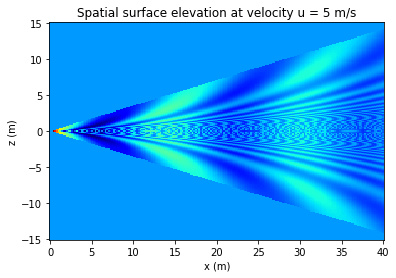

In [42]:
fig, axes = plt.subplots()
x_max, z_max = 8 * u,  3 * u
[X, Z] = np.meshgrid(np.linspace(0, x_max, 200), np.linspace(-z_max, z_max, 200))
Y = in_R(X + np.finfo(float).eps, Z) * eta(X, Z)
axes.pcolormesh(X, Z, Y, cmap=cm.jet)
axes.set_xlabel('x (m)')
axes.set_ylabel('z (m)')
axes.set_title(f'Spatial surface elevation at velocity u = {u} m/s');

 Plot spectrogram.

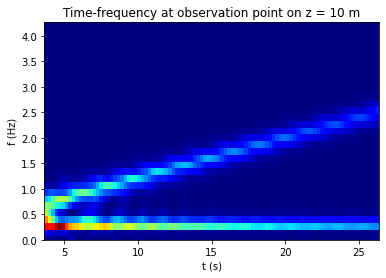

In [43]:
fig, axes = plt.subplots()
N, M, T = 2 ** 10, 2 ** 8, 30
t_start = 2 ** (3 / 2) * z / u
fs = N / T
x = u * np.linspace(t_start, t_start + T, N)
f, t, S = signal.spectrogram(eta(x, z), fs = fs, nperseg=M, noverlap=31 * M / 32)
axes.pcolormesh(t, f, S, cmap=cm.jet)
axes.set_xlabel('t (s)')
axes.set_ylabel('f (Hz)')
axes.set_ylim([0, fs / 8])
axes.set_title(f'Time-frequency at observation point on z = {z} m');